Contenido del archivo claims_2021.R 

In [12]:
warning = FALSE
# load packages
library(bupaR)
library (edeaR)
library(lubridate)

# lectura del CSV, para cargar el log de eventos.
read.csv2("log_claims_2021.csv") %>%
  mutate(Start.Timestamp = dmy(Inicio),
         Complete.Timestamp = dmy(Fin)) %>%
  activities_to_eventlog("claim_id", activity_id = "activity", 
                         timestamps = c("Start.Timestamp","Complete.Timestamp"), 
                         resource_id = "resource"
  ) -> claims2021
head(claims2021,4)
nrow(claims2021)

claim_id,activity_instance,activity,Inicio,Fin,resource,result,type,value,agent,.order,activity_instance_id,lifecycle_id,timestamp
1,10000,Accident,01-01-2008,01-01-2008,Client x,NA,NA,NA,NA,1,1,Start.Timestamp,2008-01-01
1,10001,File Claim,09-01-2008,09-01-2008,Client x,NA,Car,600,Agent A,2,2,Start.Timestamp,2008-01-09
1,10002,Check Contract,12-01-2008,13-01-2008,Assistant 1,OK,NA,NA,NA,3,3,Start.Timestamp,2008-01-12
1,10003,Franchise?,13-01-2008,13-01-2008,Assistant 1,By client,NA,NA,NA,4,4,Start.Timestamp,2008-01-13


[1] 61186

In [13]:
summary(claims2021)

Number of events:  61186
Number of cases:  2447
Number of traces:  25
Number of distinct activities:  15
Average trace length:  25.0045

Start eventlog:  2008-01-01
End eventlog:  2015-01-07



   claim_id         activity_instance                activity    
 Length:61186       Min.   :10000     Acceptance Decision: 4894  
 Class :character   1st Qu.:17648     Accident           : 4894  
 Mode  :character   Median :25296     Check Contract     : 4894  
                    Mean   :25296     Covered?           : 4894  
                    3rd Qu.:32944     File Claim         : 4894  
                    Max.   :40592     Franchise?         : 4894  
                                      (Other)            :31822  
        Inicio              Fin               resource           result     
 01-03-2010:   50   01-03-2010:   50   Client x   : 9788   By client: 4740  
 01-03-2014:   50   01-03-2014:   50   Assistant 5: 7484   NOK      :  442  
 06-08-2012:   30   04-08-2010:   30   Manager 1  : 6128   OK       : 9500  
 08-12-2012:   30   08-02-2012:   30   Manager 2  : 5016   NA's     :46504  
 10-05-2012:   30   10-05-2012:   30   Manager 3  : 4704                    
 15-11-200

¿Cuáles son las actividades que se realizan más a menudo (o menos)?

In [14]:
claims2021 %>% activities

activity,absolute_frequency,relative_frequency
Acceptance Decision,2447,0.079985618
Accident,2447,0.079985618
Check Contract,2447,0.079985618
Covered?,2447,0.079985618
File Claim,2447,0.079985618
Franchise?,2447,0.079985618
Appoint Expert,2244,0.073350113
Appoint Lawyer,2244,0.073350113
Pay Back Decision,2244,0.073350113
Receive Conclusion Expert,2244,0.073350113


¿Cuáles son los ejecutores que participan realizando más (o menos) actividades?

In [15]:
claims2021 %>% resources

resource,absolute_frequency,relative_frequency
Client x,4894,0.159971235
Assistant 5,3742,0.122315562
Manager 1,3064,0.100153630
Manager 2,2508,0.081979538
Manager 3,2352,0.076880332
Assistant 7,2254,0.073676985
Assistant 6,2219,0.072532932
Manager 4,1670,0.054587651
Assistant 4,1646,0.053803158
Assistant 9,1247,0.040760958


¿Con qué actividades comienza/termina el proceso?

In [16]:
claims2021 %>% start_activities("activity")

activity,absolute,relative,cum_sum
Accident,2447,1,1


In [17]:
claims2021 %>% end_activities("activity")

activity,absolute,relative,cum_sum
Pay Claim,2025,0.82754393,0.8275439
No Refund,219,0.08949734,0.9170413
Reject Claim,203,0.08295872,1.0000000


Joining, by = "claim_id"


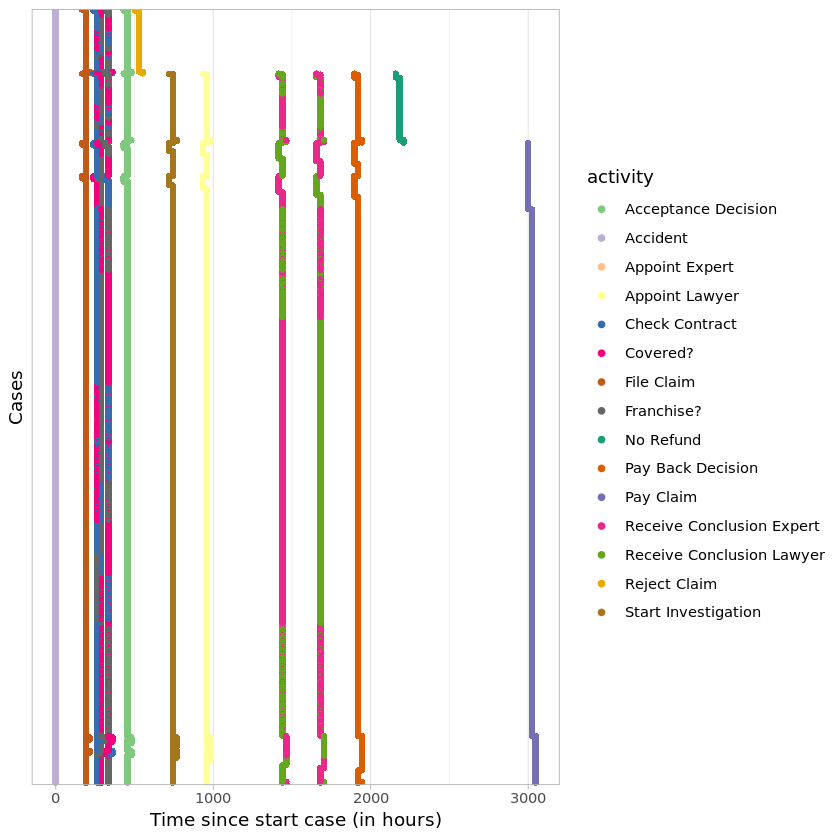

In [18]:
claims2021%>% 
  dotted_chart(
    x = "relative", 
    sort= "duration", 
    color = "activity", 
    units = "hours")



In [ ]:
claims2021 %>%
  process_map(
    type_nodes = performance (mean, "min")
  )

claims2021 %>%
  process_map(
    type_nodes = frequency ()
  )

claims2021 %>%
  filter_endpoints(
    end_activities = c("Archivar reparacion")
    ) %>%
  process_map()

claims2021 %>%
  filter_endpoints(end_activities = c("Archivar reparacion")) %>%
  filter_activity("Informar a cliente", reverse= TRUE) %>% 
  process_map()

claims2021 %>%
  filter_endpoints(end_activities = c("Archivar reparacion")) %>%
  filter_activity("Informar a cliente", reverse= TRUE) %>% 
  summary 

claims2021 %>%
  filter_endpoints(end_activities = c("Archivar reparacion")) %>%
  filter_activity("Informar a cliente", reverse= TRUE) %>% 
  resources 

claims2021 %>%
  filter_endpoints(end_activities = c("Archivar reparacion")) %>%
  filter_activity("Informar a cliente", reverse= TRUE) %>% 
  process_map(
    type_nodes = performance(),
    type_edges = performance(),
    sec_nodes = frequency (),
    sec_edgeclaims2021
claims2021 %>%
  filter_endpoints(end_activities = c("Archivar reparacion")) %>%
  filter_activity("Informar a cliente", reverse= TRUE) %>% 
  process_map(
     type_nodes = performance(max, "mins"),
     type_edges = performance(max, "mins"),
     sec_nodes = performance (min, "mins"),
     sec_edges = performance (min, "mins")
  )

In [ ]:

#Throughput  time
ReparacionTelefonos %>%
  filter_endpoints(end_activities = c("Archivar reparacion")) %>%
  filter_activity("Informar a cliente", reverse= TRUE) %>% 
  filter_throughput_time(interval = c(NA,1) , units = "hours") %>%
  process_map(
    type_nodes = performance(),
    type_edges = performance(),
    sec_nodes = frequency (),
    sec_edges = frequency()
  )

ReparacionTelefonos %>%
  filter_endpoints(end_activities = c("Archivar reparacion")) %>%
  filter_activity("Informar a cliente", reverse= TRUE) %>% 
  filter_throughput_time(interval = c(1, NA) , units = "hours", reverse = TRUE) %>%
  process_map(
    type_nodes = performance(),
    type_edges = performance(),
    sec_nodes = frequency (),
    sec_edges = frequency()
  )

ReparacionTelefonos %>%
  filter_endpoints(end_activities = c("Archivar reparacion")) %>%
  filter_activity("Informar a cliente", reverse= TRUE) %>% 
  filter_trace_length( interval = c(NA,10)) %>%
  process_map(
    type_nodes = performance(),
    type_edges = performance(),
    sec_nodes = frequency (),
    sec_edges = frequency()
  )

ReparacionTelefonos %>%
  filter_endpoints(end_activities = c("Archivar reparacion")) %>%
  filter_activity("Informar a cliente", reverse= TRUE) %>% 
  filter_trace_length( interval = c(NA,10)) %>%
  trace_explorer (coverage = 1)

#Control Flow
ReparacionTelefonos %>%
  filter_endpoints(end_activities = c("Archivar reparacion")) %>%
  filter_activity("Informar a cliente", reverse= TRUE) %>% 
  filter_activity_presence(activities = c("Reparacion (compleja)")) %>%
  process_map(  )


? filter_precedence
ReparacionTelefonos %>%
  filter_endpoints(end_activities = c("Archivar reparacion")) %>%
  filter_activity("Informar a cliente", reverse= TRUE) %>% 
  filter_precedence(
    antecedents = c("Reparacion (simple)"), 
    consequents = c("Reparacion (compleja)"),
    precedence_type = c("eventually_follows")
  ) %>%
  process_map()

#Dashboard para analizar especializaci�n de recursos
ReparacionTelefonos %>%
  resource_dashboard()


ReparacionTelefonos %>%
  filter_endpoints(end_activities = c("Archivar reparacion")) %>%
  filter_activity("Informar a cliente", reverse= TRUE) %>% 
  filter_precedence(
    antecedents = c("Reparacion (simple)"), 
    consequents = c("Reparacion (compleja)"),
    precedence_type = c("eventually_follows")
  ) -> MyRep


  MyRep <-   filter_endpoints(ReparacionTelefonos, end_activities = c("Archivar reparacion")) 
  MyRep <-    filter_activity(MyRep, "Informar a cliente", reverse= TRUE)

  
  MyRep %>%
    filter_precedence(
      antecedents = c("Reparacion (simple)"), 
      consequents = c("Reparacion (compleja)"),
      precedence_type = c("eventually_follows")
    ) %>%
    process_map(
      rankdir = "TB"
    )
  
  
  # Log mesa ayuda
  
  setwd("C:/Users/Juan Pablo Salazar/Dropbox/Doctorado PUC/Miner�a de Procesos/Ayudant�a bupaR 2021/Tarea")

  read.csv2("log-mesa-ayuda-2.csv") %>%
    mutate(Start.Timestamp = dmy_hm(Inicio),
           Complete.Timestamp = dmy_hm(Fin)) %>%
    activities_to_eventlog(case_id= "ID.caso", activity_id = "Nombre.Actividad",
                           timestamps = c("Start.Timestamp","Complete.Timestamp"),
                           resource_id = "Ejecutor"
    ) -> log_mesa_ayuda
  
  
  #1.An�lisis exploratorio
  
  summary (log_mesa_ayuda)
  table(log_mesa_ayuda$Nombre.Actividad)
  table(log_mesa_ayuda$Ejecutor)
  
  log_mesa_ayuda %>%   activities
  
  
  log_mesa_ayuda %>%   resources
  
  
  log_mesa_ayuda %>%   start_activities("activity")
  
  log_mesa_ayuda %>%   end_activities("activity")
    
  
  log_mesa_ayuda %>% process_map()

  log_mesa_ayuda %>% trace_explorer (coverage = 0.8)
  
  log_mesa_ayuda %>%
    filter_trace_frequency( interval = c(10, 100)) %>%
    trace_explorer(coverage =1)
    process_map()
  
    log_mesa_ayuda %>%
      filter_trace_frequency( percentage = 0.6) %>% 
      trace_explorer (coverage =1 )
  ?
  ?trace_explorer
    
    log_mesa_ayuda %>%
      filter_trace_frequency( interval = c(608, NA)) %>%
      trace_explorer(coverage =1)